#   IAU Zadanie - III. fáza

### Autori: Peter Brandajsky - 50%, Frederik Duvač - 50%

#### Kedze bolo predosle zadanie chaoticky napisane ohladom toho co mame exportnut, tak sme upravili export kde transformujeme aj testovaci dataset pomocou nasej pipeline. Upraveny kod vyzeral takto:


In [1]:
'''
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, MinMaxScaler, FunctionTransformer
import pandas as pd

# Definícia stĺpcov
normal_columns = [
    'c.android.gm', 'c.android.chrome', 'c.dogalize', 'c.katana',
    'c.android.youtube', 'p.android.documentsui', 'p.system',
    'p.android.chrome', 'p.android.externalstorage', 'p.android.gm',
    'p.android.packageinstaller'
]
skewed_column = ['p.olauncher']

X_train = train_data.drop(columns=['mwra'])
y_train = train_data['mwra']
X_test = test_data.drop(columns=['mwra'])
y_test = test_data['mwra']

# Krok 1: Quantile Transformácia pre šikmý stĺpec
quantile_transformer = Pipeline(steps=[
    ('transform', make_column_transformer(
        (QuantileTransformer(output_distribution="normal", random_state=42), skewed_column),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 2: Power Transformácia pre normálne stĺpce
power_transformer = Pipeline(steps=[
    ('transform', make_column_transformer(
        (PowerTransformer(method='yeo-johnson', standardize=True), normal_columns),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 3: Standard Scaling pre normálne stĺpce
standard_scaler = Pipeline(steps=[
    ('transform', make_column_transformer(
        (StandardScaler(), normal_columns),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Krok 4: Min-Max Scaling pre šikmý stĺpec
minmax_scaler = Pipeline(steps=[
    ('transform', make_column_transformer(
        (MinMaxScaler(), skewed_column),
        remainder='passthrough')),
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=X_train.columns)))
])

# Vytvorenie hlavnej Pipeline s každým krokom zvlášť
pipeline = Pipeline(steps=[
    ('quantile', quantile_transformer),
    ('power', power_transformer),
    ('scaler', standard_scaler),
    ('minmax', minmax_scaler),
], verbose=True)

# Aplikácia pipeline na trénovacie dáta bez 'mwra'
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Spojenie transformovaných dát s cieľovým stĺpcom 'mwra'
train_transformed = pd.concat([y_train.reset_index(drop=True), X_train_transformed], axis=1)
test_transformed = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(X_test_transformed, columns=X_test.columns)], axis=1)

train_transformed
test_transformed

train_transformed.to_csv('dataset/train_transformed.csv', sep='\t', index=False, encoding='utf-8')
test_transformed.to_csv('dataset/test_transformed.csv', sep='\t', index=False, encoding='utf-8')

train_data.to_csv('dataset/train_data.csv', sep='\t', index=False, encoding='utf-8')
test_data.to_csv('dataset/test_data.csv', sep='\t', index=False, encoding='utf-8')
'''

'\nfrom sklearn.compose import make_column_transformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import QuantileTransformer, PowerTransformer, StandardScaler, MinMaxScaler, FunctionTransformer\nimport pandas as pd\n\n# Definícia stĺpcov\nnormal_columns = [\n    \'c.android.gm\', \'c.android.chrome\', \'c.dogalize\', \'c.katana\',\n    \'c.android.youtube\', \'p.android.documentsui\', \'p.system\',\n    \'p.android.chrome\', \'p.android.externalstorage\', \'p.android.gm\',\n    \'p.android.packageinstaller\'\n]\nskewed_column = [\'p.olauncher\']\n\nX_train = train_data.drop(columns=[\'mwra\'])\ny_train = train_data[\'mwra\']\nX_test = test_data.drop(columns=[\'mwra\'])\ny_test = test_data[\'mwra\']\n\n# Krok 1: Quantile Transformácia pre šikmý stĺpec\nquantile_transformer = Pipeline(steps=[\n    (\'transform\', make_column_transformer(\n        (QuantileTransformer(output_distribution="normal", random_state=42), skewed_column),\n        remainder=\'passthrough\'

# Načítanie údajov z datasetu


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('dataset/train_transformed.csv', sep='\t')
test_data = pd.read_csv('dataset/test_transformed.csv', sep='\t')

In [3]:
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

# Kontrola rozmerov
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data:
   mwra  c.android.gm  c.android.chrome  c.dogalize  c.katana  \
0   1.0      0.403027         -1.572328   -1.196035  2.301022   
1   1.0      0.908776          0.707338    1.151811 -0.251835   
2   1.0      0.351158          1.938269   -1.274725  0.809769   
3   0.0      0.325842          0.640564   -0.361116 -0.864497   
4   1.0      0.734380          0.059038   -0.449809 -0.117029   

   c.android.youtube  p.android.documentsui  p.system  p.android.chrome  \
0          -0.703173               0.915003 -0.838687         -1.642949   
1           2.136694               0.416367 -1.502387          0.676350   
2          -0.008190               0.034201 -1.512423          1.091820   
3          -0.427110              -1.567158  0.530647          0.571926   
4          -0.569458               0.434554  0.497189          1.137384   

   p.android.externalstorage  p.android.gm  p.android.packageinstaller  \
0                  -1.695976     -2.154663                   -0.424138  

In [4]:
train_data.describe()

,mwra,c.android.gm,c.android.chrome,c.dogalize,c.katana,c.android.youtube,p.android.documentsui,p.system,p.android.chrome,p.android.externalstorage,p.android.gm,p.android.packageinstaller,p.olauncher
count,11907.000000,11907.000000,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04,1.190700e+04
mean,0.626522,0.501998,2.028929e-17,-1.581371e-17,3.162742e-17,-2.386975e-18,2.983719e-17,-2.685347e-18,-9.547899e-18,9.547899e-18,-3.580462e-18,-1.641045e-17,2.864370e-17
std,0.483748,0.174433,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,0.000000,0.000000,-8.250101e+00,-2.566519e+00,-3.747457e+00,-2.834789e+00,-2.926061e+00,-2.739135e+00,-2.743906e+00,-3.295124e+00,-2.913980e+00,-3.009567e+00,-2.903089e+00
25%,0.000000,0.374909,-5.331085e-01,-7.061476e-01,-6.904017e-01,-7.120093e-01,-7.333529e-01,-7.427930e-01,-6.788563e-01,-7.034967e-01,-7.109043e-01,-6.794619e-01,-7.157187e-01
50%,1.000000,0.496021,5.903843e-02,2.406279e-02,-4.729727e-02,2.060091e-02,2.744748e-02,3.552965e-02,1.104699e-02,-1.158652e-02,-5.105099e-03,-1.850603e-02,-4.326195e-03
75%,1.000000,0.624946,4.666989e-01,7.005522e-01,6.979867e-01,7.137299e-01,7.145480e-01,7.404522e-01,6.796264e-01,7.001055e-01,7.261543e-01,6.924067e-01,7.231563e-01
max,1.000000,1.000000,1.938269e+00,3.000127e+00,2.315489e+00,2.833192e+00,2.871607e+00,2.999376e+00,2.696656e+00,2.542503e+00,2.794550e+00,2.589904e+00,2.766666e+00


In [5]:
test_data.describe()

,mwra,c.android.gm,c.android.chrome,c.dogalize,c.katana,c.android.youtube,p.android.documentsui,p.system,p.android.chrome,p.android.externalstorage,p.android.gm,p.android.packageinstaller,p.olauncher
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,0.626470,0.511347,0.024020,0.025745,-0.015024,0.036886,-0.008899,-0.011486,0.038201,0.002155,-0.000192,0.014894,-0.000304
std,0.483822,0.177849,1.010466,0.995494,0.992461,1.017747,1.016067,0.970615,1.011245,1.014653,0.983529,0.998040,0.989041
min,0.000000,-0.002998,-4.927564,-2.565571,-3.548448,-2.800601,-2.940977,-2.639229,-2.747525,-3.119693,-2.985954,-2.980247,-2.911208
25%,0.000000,0.379537,-0.495842,-0.660863,-0.677556,-0.666094,-0.753827,-0.698564,-0.638178,-0.706477,-0.686200,-0.683492,-0.687749
50%,1.000000,0.506209,0.059038,0.040588,-0.047297,0.058036,-0.002603,0.017328,0.034836,-0.018579,-0.004476,0.006095,0.017368
75%,1.000000,0.638797,0.495437,0.716173,0.656435,0.742826,0.738715,0.679082,0.729077,0.727785,0.734095,0.694419,0.733685
max,1.000000,1.006502,1.938269,2.902259,2.335016,2.825817,2.882211,2.955397,2.727371,2.566141,2.778743,2.604146,2.746311


In [6]:
# Rozdelenie na atributy a cielovu premennu
X_train = train_data.drop(columns=['mwra'])
y_train = train_data['mwra']

X_test = test_data.drop(columns=['mwra'])
y_test = test_data['mwra']

# Kontrola rozmerov
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (11907, 12), y_train Shape: (11907,)
X_test Shape: (2977, 12), y_test Shape: (2977,)


In [7]:
# Kontrola distribucie tried
print("Distribúcia v trénovacom datasete:")
print(y_train.value_counts(normalize=True))

print("\nDistribúcia v testovacom datasete:")
print(y_test.value_counts(normalize=True))

Distribúcia v trénovacom datasete:
mwra
1.0    0.626522
0.0    0.373478
Name: proportion, dtype: float64

Distribúcia v testovacom datasete:
mwra
1.0    0.62647
0.0    0.37353
Name: proportion, dtype: float64


# 3.1 Jednoduchý klasikátor na základe závislosti v dátach

## 3.1.A Implementácia ID3 klasifikátora

In [8]:
# Rekurzivne rozdelenie dat do podmnozin na zaklade najlepsieho atributu
class DecisionNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


# Funkcia na vypocet entropie aktualnej datovej mnoziny
def calculate_entropy(y):
    counts = Counter(y)
    total = len(y)
    entropy = -sum((count / total) * np.log2(count / total) for count in counts.values())
    return entropy


# Funkcia na vypocet informacneho zisku pre numericke atributy
def information_gain(X, y, feature):
    parent_entropy = calculate_entropy(y)

    # Pre numericke atributy potrebujeme vypocitat prahove hodnoty
    thresholds = X[feature].sort_values().unique()
    best_gain = 0
    best_threshold = None

    for threshold in thresholds:
        left_y = y[X[feature] <= threshold]
        right_y = y[X[feature] > threshold]

        # Vypocitame vazenu entropiu pre dany prah
        weighted_entropy = (
                (len(left_y) / len(y)) * calculate_entropy(left_y)
                + (len(right_y) / len(y)) * calculate_entropy(right_y)
        )

        gain = parent_entropy - weighted_entropy
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold

    return best_gain, best_threshold


# Trieda ID3Classifier s podporou numerickych dat
class ID3Classifier:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1:
            return DecisionNode(value=y.iloc[0])

        if depth == self.max_depth:
            return DecisionNode(value=y.mode()[0])

        # Najdeme najlepsi atribut a prah
        best_feature = None
        best_threshold = None
        best_gain = -1

        for feature in X.columns:
            gain, threshold = information_gain(X, y, feature)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

        # Ak neexistuje ziadne delenie, vratime list
        if best_feature is None:
            return DecisionNode(value=y.mode()[0])

        node = DecisionNode(feature=best_feature, threshold=best_threshold)
        left_mask = X[best_feature] <= best_threshold
        right_mask = X[best_feature] > best_threshold

        node.left = self.fit(X[left_mask], y[left_mask], depth + 1)
        node.right = self.fit(X[right_mask], y[right_mask], depth + 1)

        return node

    def predict_one(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return X.apply(lambda x: self.predict_one(x, self.tree), axis=1)


# Trenovanie ID3 modelu
id3 = ID3Classifier(max_depth=3)
id3.tree = id3.fit(X_train, y_train)

# Predikcia na trenovacej a testovacej mnozine
y_train_pred = id3.predict(X_train)
y_test_pred = id3.predict(X_test)

print("Train predikcie:\n", y_train_pred)
print("Test predikcie:\n", y_test_pred)

Train predikcie:
 0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
11902    0.0
11903    0.0
11904    1.0
11905    1.0
11906    0.0
Length: 11907, dtype: float64
Test predikcie:
 0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
2972    0.0
2973    0.0
2974    0.0
2975    1.0
2976    1.0
Length: 2977, dtype: float64


## 3.1.B Vyhodnotenie modelu

In [9]:
print("Výsledky pre trénovaciu množinu:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred, average='binary'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_train, y_train_pred))

print("\nVýsledky pre testovaciu množinu:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='binary'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred, average='binary'):.4f}")
print("\nPodrobný report:")
print(classification_report(y_test, y_test_pred))

Výsledky pre trénovaciu množinu:
Accuracy: 0.8653
Precision: 0.8759
Recall: 0.9146

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      4447
         1.0       0.88      0.91      0.89      7460

    accuracy                           0.87     11907
   macro avg       0.86      0.85      0.85     11907
weighted avg       0.86      0.87      0.86     11907


Výsledky pre testovaciu množinu:
Accuracy: 0.8707
Precision: 0.8826
Recall: 0.9153

Podrobný report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1112
         1.0       0.88      0.92      0.90      1865

    accuracy                           0.87      2977
   macro avg       0.87      0.86      0.86      2977
weighted avg       0.87      0.87      0.87      2977



### Interpretácia výsledkov pre max depth 3:
1. Presnosť (Accuracy):
    - Trénovacia presnosť: 86.53 %
    - Testovacia presnosť: 87.07 %
    - Obidve sú veľmi dobré a pomerne stabilné medzi trénovacím a testovacím datasetom, čo naznačuje, že model dobre generalizuje.

2. Presnosť (Precision):
    - Trénovacia presnosť: 87.59 %
    - Testovacia presnosť: 88.26 %
    - Vysoká presnosť na oboch množinách znamená, že model minimalizuje počet falošných pozitív (t.j. nesprávne klasifikované pozitívne prípady).

3. Recall (Revokovanie):
    - Trénovacia revokácia: 91.46 %
    - Testovacia revokácia: 91.53 %
    - Model má veľmi vysokú recall hodnotu, čo znamená, že zachytáva väčšinu skutočných pozitívnych prípadov, čo je dôležité pre odhaľovanie malvéru.

4. F1-Score:
    - F1-Score (pre triedu 1.0): 0.89 (trénovacia) a 0.90 (testovacia)
    - F1-Score je veľmi dobrá metrika pre nevyvážené dáta, ako je náš prípad, kde jedna trieda (1.0) je viac zastúpená. Tento výsledok ukazuje, že model má veľmi dobrý kompromis medzi presnosťou a recallom.

5. Macro a weighted average:
    - Macro avg (priemer medzi triedami):
        - Trénovanie: Precision 0.86, Recall 0.85
        - Testovanie: Precision 0.87, Recall 0.86
    - Weighted avg (vážený priemer podľa počtu príkladov v každej triede):
        - Trénovanie: Precision 0.86, Recall 0.87
        - Testovanie: Precision 0.87, Recall 0.87
    - Tieto hodnoty tiež naznačujú, že model je vyvážený medzi oboma triedami, bez výrazných sklonov.

## 3.1.C Overenie overfittingu

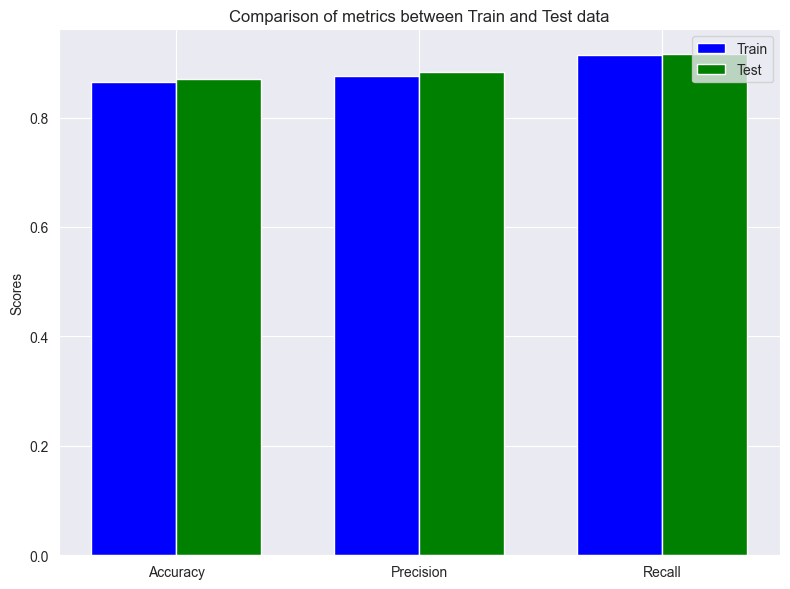

In [10]:
# Metriky pre trenovaciu a testovaciu mnozinu
train_metrics = [accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred)]
test_metrics = [accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred)]

metrics = ['Accuracy', 'Precision', 'Recall']

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Stlpce pre trenovaciu a testovaciu mnozinu
rects1 = ax.bar(x - width/2, train_metrics, width, label='Train', color='b')
rects2 = ax.bar(x + width/2, test_metrics, width, label='Test', color='g')

# Pridanie popisov, titulkov a zobrazenie
ax.set_ylabel('Scores')
ax.set_title('Comparison of metrics between Train and Test data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

#### Naše výsledky sú veľmi dobré! Máme vysokú presnosť, recall aj F1-skóre, ktoré naznačujú, že model funguje veľmi dobre na detekciu mwra aktivity. Z interpretácie výsledkov a z grafu vidíme, že metriky sú vyvážené a pre testovaciu množinu sú o niečo lepšie, preto náš model nie je preučený.

# 3.2 Trénovanie a vyhodnotenie klasikátorov strojového učenia

## 3.2.A

## 3.2.B

## 3.2.C

## 3.2.D

## 3.2.E

# 3.3 Optimalizácia alias hyperparameter tuning

## 3.3.A

## 3.3.B

## 3.3.C

## 3.3.D

# 3.4 Vyhodnotenie vplyvu zvolenej stratégie riešenia na klasikáciu

## 3.4.A

## 3.4.B

## 3.4.C

## 3.4.D

## 3.4.E